In [1]:
import pandas as pd 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

df_4 = pd.read_csv('C:/Users/santi/Downloads/NIVEL4.txt', delim_whitespace=True)
df_3 = pd.read_csv('C:/Users/santi/Downloads/NIVEL3.txt', delim_whitespace=True)
df_2 = pd.read_csv('C:/Users/santi/Downloads/NIVEL2.txt', delim_whitespace=True)
df_1 = pd.read_csv('C:/Users/santi/Downloads/NIVEL1.txt', delim_whitespace=True)
df_4 = df_4.drop(0)
df_3 = df_3.drop(0)
df_2 = df_2.drop(0)
df_1 = df_1.drop([0, 1], axis=0)

In [2]:
df_2 

,0.100000E+01,0.100000E+01.1,0.100000E+01.2,0.100000E+01.3,0.200000E+01,0.200000E+01.1,0.100000E+01.4,0.100000E+01.5,0.100000E+01.6,0.100000E+01.7,...,0.100000E+01.68,0.100000E+01.69,0.100000E+01.70,0.100000E+01.71,0.100000E+01.72,0.100000E+01.73,0.100000E+01.74,0.100000E+01.75,0.200000E+01.10,0.200000E+01.11
1,1.619000e-07,10168.0,3.763000e-07,11673.0,1.440000e-08,12559.0,1.194000e-07,10189.0,1.160000e-07,11630.0,...,6.250000e-08,10541.0,1.412000e-07,9701.0,4.320000e-08,10730.0,3.630000e-08,10429.0,1.313000e-07,9921.0
2,1.618000e-07,10168.0,3.763000e-07,11672.0,1.440000e-08,12561.0,1.194000e-07,10169.0,1.160000e-07,11629.0,...,6.240000e-08,10540.0,1.411000e-07,9695.0,4.320000e-08,10731.0,3.630000e-08,10429.0,1.313000e-07,9921.0
3,1.618000e-07,10169.0,3.762000e-07,11671.0,1.440000e-08,12565.0,1.194000e-07,10151.0,1.159000e-07,11628.0,...,6.250000e-08,10540.0,1.411000e-07,9687.0,4.320000e-08,10736.0,3.630000e-08,10428.0,1.313000e-07,9921.0
4,1.617000e-07,10170.0,3.761000e-07,11664.0,1.440000e-08,12562.0,1.194000e-07,10130.0,1.159000e-07,11625.0,...,6.250000e-08,10540.0,1.411000e-07,9681.0,4.320000e-08,10737.0,3.630000e-08,10430.0,1.313000e-07,9921.0
5,1.617000e-07,10171.0,3.761000e-07,11661.0,1.440000e-08,12556.0,1.194000e-07,10109.0,1.159000e-07,11623.0,...,6.250000e-08,10540.0,1.412000e-07,9672.0,4.320000e-08,10738.0,3.630000e-08,10427.0,1.312000e-07,9922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26876,1.199000e-07,11765.0,8.210000e-08,10970.0,6.390000e-08,13584.0,1.075000e-07,11543.0,7.490000e-08,12091.0,...,7.570000e-08,11511.0,1.393000e-07,12037.0,7.320000e-08,11997.0,7.790000e-08,12125.0,1.041000e-07,11502.0
26877,1.199000e-07,11767.0,8.210000e-08,10968.0,6.390000e-08,13581.0,1.074000e-07,11537.0,7.490000e-08,12088.0,...,7.570000e-08,11509.0,1.393000e-07,12037.0,7.320000e-08,12006.0,7.780000e-08,12122.0,1.041000e-07,11502.0
26878,1.199000e-07,11767.0,8.210000e-08,10965.0,6.390000e-08,13585.0,1.075000e-07,11530.0,7.490000e-08,12087.0,...,7.570000e-08,11505.0,1.393000e-07,12037.0,7.320000e-08,12014.0,7.780000e-08,12119.0,1.041000e-07,11502.0
26879,1.199000e-07,11766.0,8.200000e-08,10960.0,6.390000e-08,13610.0,1.075000e-07,11522.0,7.490000e-08,12083.0,...,7.570000e-08,11508.0,1.393000e-07,12035.0,7.320000e-08,12018.0,7.790000e-08,12115.0,1.041000e-07,11502.0


<p> Tomar segmentos de 10 segundos cada 320 entradas de datos. Cada diez segundos hago un vector y calculo la correlación entre el primer vector y el segundo vector después entre el tercer vector y el segundo. Incluir barra de error y desviación estándar para cada nivel.</p>

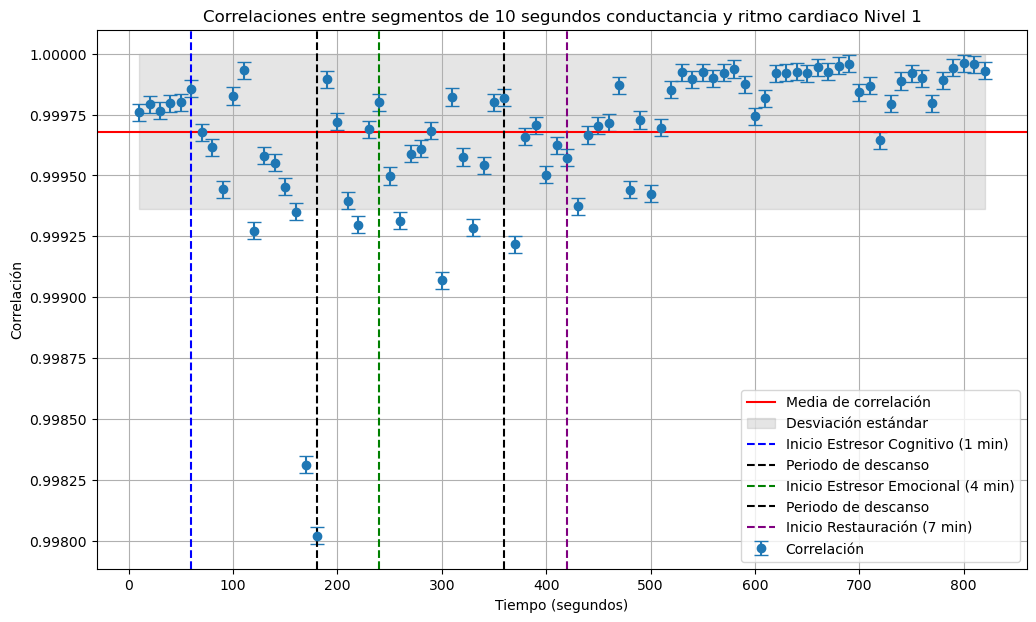

In [5]:
# Variables para el análisis
segment_size = 320  # Tamaño del segmento de 10 segundos
sampling_rate = 32  # Frecuencia de muestreo (32 Hz es un ejemplo; ajusta según tus datos)
num_segments = len(df_1) // segment_size  # Cantidad de segmentos posibles

# Crear una lista para almacenar los vectores
vectors = []

# Iterar y dividir el DataFrame en segmentos de 320 entradas
for i in range(num_segments):
    start_index = i * segment_size
    end_index = (i + 1) * segment_size
    vectors.append(df_1.iloc[start_index:end_index].values.flatten())

# Calcular correlaciones entre pares de vectores
correlations = []
for i in range(1, len(vectors)):
    correlation = np.corrcoef(vectors[i-1], vectors[i])[0, 1]
    correlations.append(correlation)

# Calcular la media, desviación estándar y errores estándar
mean_corr = np.mean(correlations)
std_corr = np.std(correlations)
stderr_corr = std_corr / np.sqrt(len(correlations))

# Crear el eje x basado en el tiempo
time_axis = [(i * segment_size) / sampling_rate for i in range(1, len(correlations) + 1)]

# Graficar las correlaciones con barra de error
plt.figure(figsize=(12, 7))
plt.errorbar(time_axis, correlations, yerr=stderr_corr, fmt='o', capsize=5, label='Correlación')
plt.axhline(y=mean_corr, color='r', linestyle='-', label='Media de correlación')
plt.fill_between(time_axis, mean_corr - std_corr, mean_corr + std_corr, alpha=0.2, color='gray', label='Desviación estándar')

# Agregar líneas verticales para las fases
plt.axvline(x=60, color='blue', linestyle='--', label='Inicio Estresor Cognitivo (1 min)')
plt.axvline(x=180, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=240, color='green', linestyle='--', label='Inicio Estresor Emocional (4 min)')
plt.axvline(x=360, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=420, color='purple', linestyle='--', label='Inicio Restauración (7 min)')

# Etiquetas y título
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Correlación')
plt.title('Correlaciones entre segmentos de 10 segundos conductancia y ritmo cardiaco Nivel 1')
plt.legend()
plt.grid(True)
plt.show()

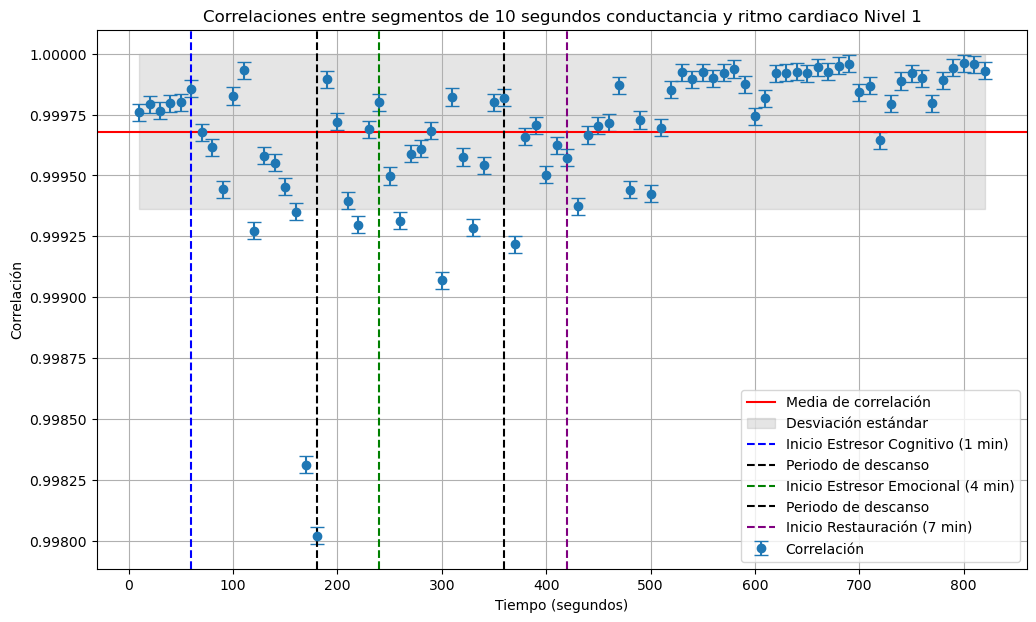

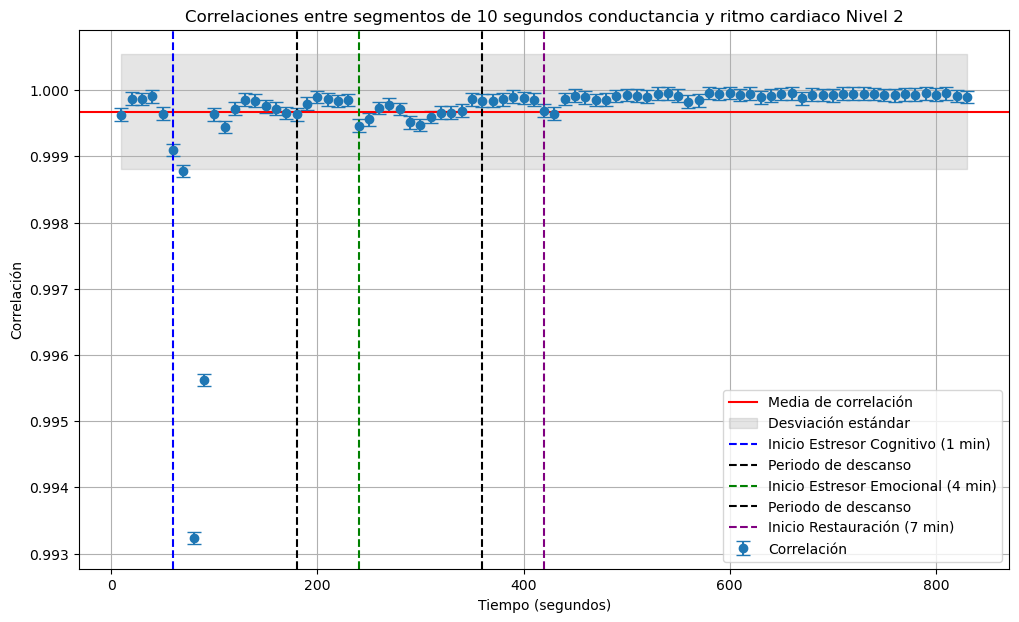

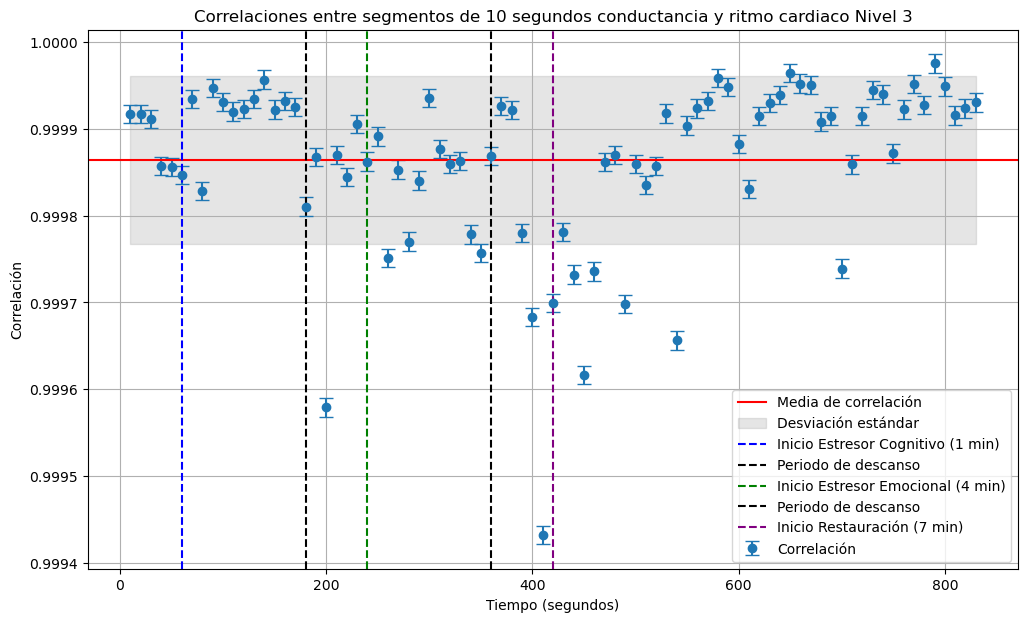

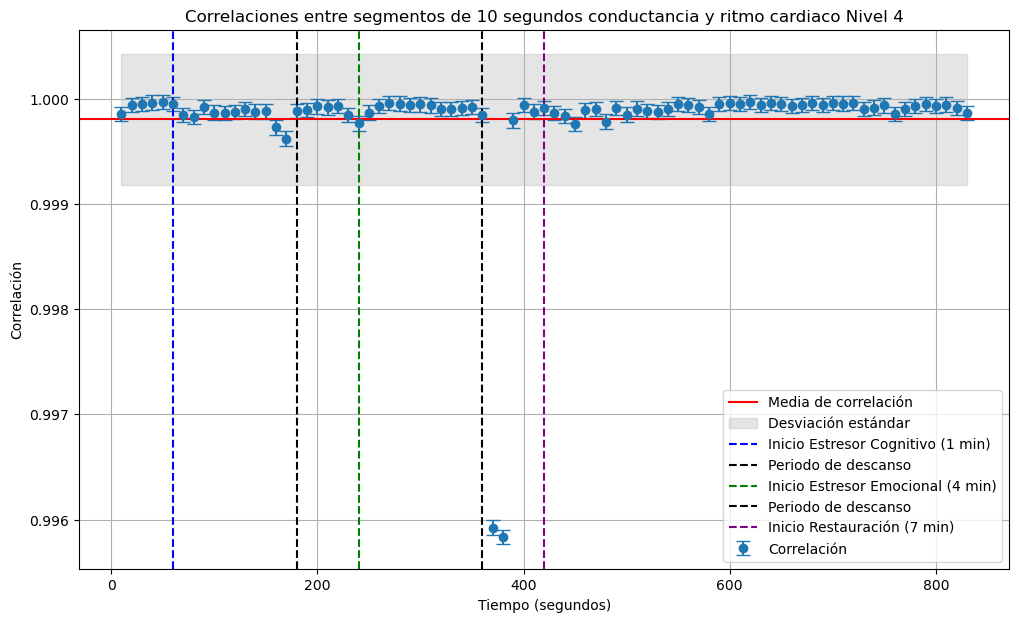

In [6]:
# Lista de DataFrames y títulos correspondientes
dataframes = [df_1, df_2, df_3, df_4]
titles = ['Nivel 1', 'Nivel 2', 'Nivel 3', 'Nivel 4']

# Loop sobre los DataFrames
for idx, df in enumerate(dataframes):
    # Variables para el análisis
    segment_size = 320  # Tamaño del segmento de 10 segundos
    sampling_rate = 32  # Frecuencia de muestreo (32 Hz es un ejemplo; ajusta según tus datos)
    num_segments = len(df) // segment_size  # Cantidad de segmentos posibles

    # Crear una lista para almacenar los vectores
    vectors = []

    # Iterar y dividir el DataFrame en segmentos de 320 entradas
    for i in range(num_segments):
        start_index = i * segment_size
        end_index = (i + 1) * segment_size
        vectors.append(df.iloc[start_index:end_index].values.flatten())

    # Calcular correlaciones entre pares de vectores
    correlations = []
    for i in range(1, len(vectors)):
        correlation = np.corrcoef(vectors[i-1], vectors[i])[0, 1]
        correlations.append(correlation)

    # Calcular la media, desviación estándar y errores estándar
    mean_corr = np.mean(correlations)
    std_corr = np.std(correlations)
    stderr_corr = std_corr / np.sqrt(len(correlations))

    # Crear el eje x basado en el tiempo
    time_axis = [(i * segment_size) / sampling_rate for i in range(1, len(correlations) + 1)]

    # Graficar las correlaciones con barra de error
    plt.figure(figsize=(12, 7))
    plt.errorbar(time_axis, correlations, yerr=stderr_corr, fmt='o', capsize=5, label='Correlación')
    plt.axhline(y=mean_corr, color='r', linestyle='-', label='Media de correlación')
    plt.fill_between(time_axis, mean_corr - std_corr, mean_corr + std_corr, alpha=0.2, color='gray', label='Desviación estándar')

    # Agregar líneas verticales para las fases
    plt.axvline(x=60, color='blue', linestyle='--', label='Inicio Estresor Cognitivo (1 min)')
    plt.axvline(x=180, color='black', linestyle='--', label='Periodo de descanso')
    plt.axvline(x=240, color='green', linestyle='--', label='Inicio Estresor Emocional (4 min)')
    plt.axvline(x=360, color='black', linestyle='--', label='Periodo de descanso')
    plt.axvline(x=420, color='purple', linestyle='--', label='Inicio Restauración (7 min)')

    # Etiquetas y título
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Correlación')
    plt.title(f'Correlaciones entre segmentos de 10 segundos conductancia y ritmo cardiaco {titles[idx]}')
    plt.legend()
    plt.grid(True)
    
    # Mostrar la gráfica
    plt.show()


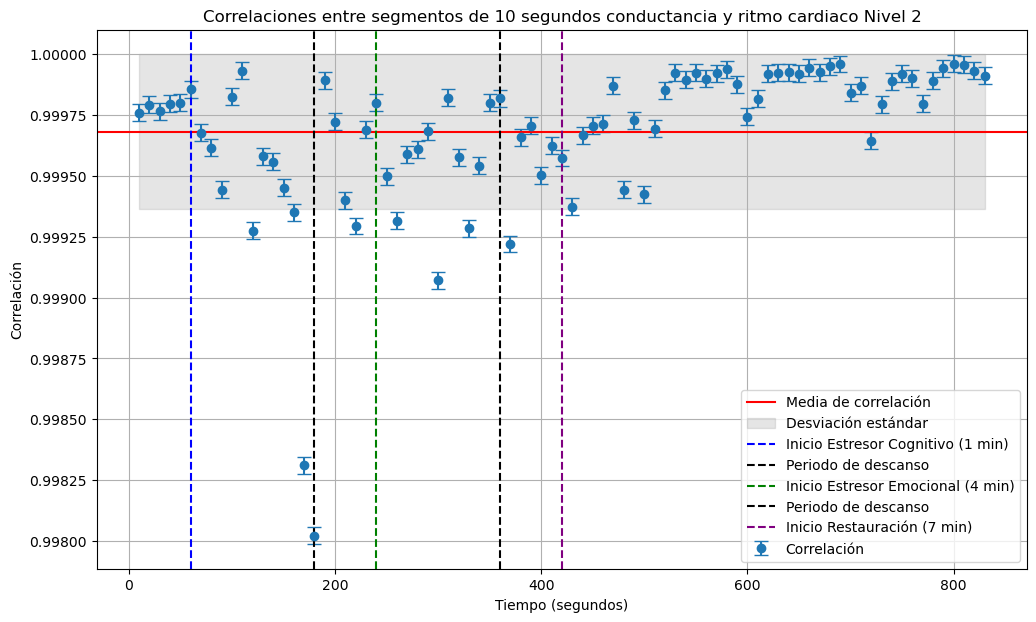

In [10]:
num_segments = len(df_2) // segment_size  # Cantidad de segmentos posibles

# Crear una lista para almacenar los vectores
vectors = []

# Iterar y dividir el DataFrame en segmentos de 320 entradas
for i in range(num_segments):
    start_index = i * segment_size
    end_index = (i + 1) * segment_size
    vectors.append(df_1.iloc[start_index:end_index].values.flatten())

# Calcular correlaciones entre pares de vectores
correlations = []
for i in range(1, len(vectors)):
    correlation = np.corrcoef(vectors[i-1], vectors[i])[0, 1]
    correlations.append(correlation)

# Calcular la media, desviación estándar y errores estándar
mean_corr = np.mean(correlations)
std_corr = np.std(correlations)
stderr_corr = std_corr / np.sqrt(len(correlations))

# Crear el eje x basado en el tiempo
time_axis = [(i * segment_size) / sampling_rate for i in range(1, len(correlations) + 1)]

# Graficar las correlaciones con barra de error
plt.figure(figsize=(12, 7))
plt.errorbar(time_axis, correlations, yerr=stderr_corr, fmt='o', capsize=5, label='Correlación')
plt.axhline(y=mean_corr, color='r', linestyle='-', label='Media de correlación')
plt.fill_between(time_axis, mean_corr - std_corr, mean_corr + std_corr, alpha=0.2, color='gray', label='Desviación estándar')

# Agregar líneas verticales para las fases
plt.axvline(x=60, color='blue', linestyle='--', label='Inicio Estresor Cognitivo (1 min)')
plt.axvline(x=180, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=240, color='green', linestyle='--', label='Inicio Estresor Emocional (4 min)')
plt.axvline(x=360, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=420, color='purple', linestyle='--', label='Inicio Restauración (7 min)')

# Etiquetas y título
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Correlación')
plt.title('Correlaciones entre segmentos de 10 segundos conductancia y ritmo cardiaco Nivel 2')
plt.legend()
plt.grid(True)
plt.show()

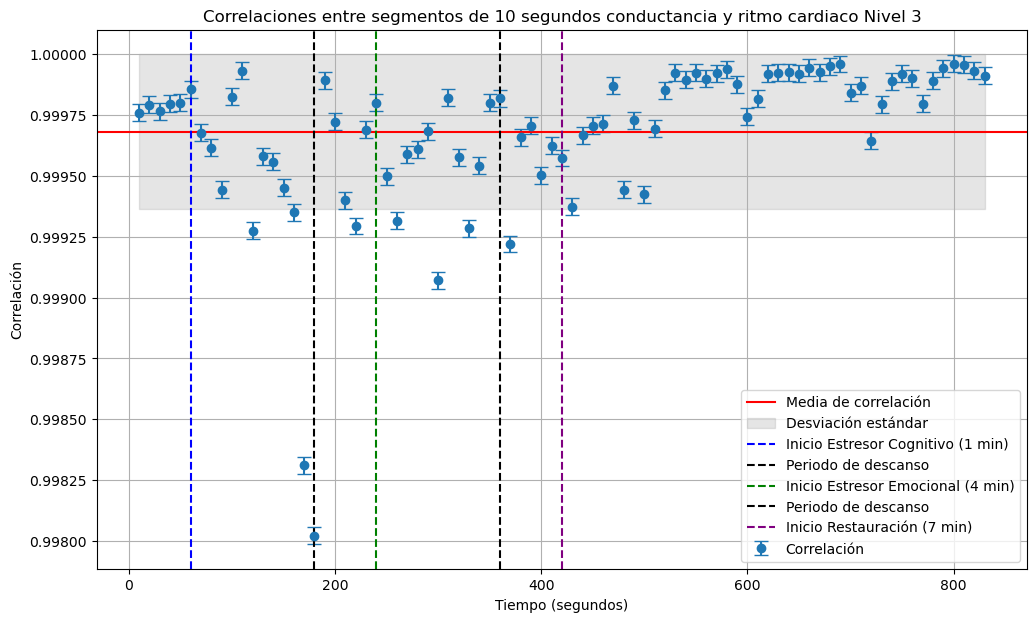

In [12]:
num_segments = len(df_3) // segment_size  # Cantidad de segmentos posibles

# Crear una lista para almacenar los vectores
vectors = []

# Iterar y dividir el DataFrame en segmentos de 320 entradas
for i in range(num_segments):
    start_index = i * segment_size
    end_index = (i + 1) * segment_size
    vectors.append(df_1.iloc[start_index:end_index].values.flatten())

# Calcular correlaciones entre pares de vectores
correlations = []
for i in range(1, len(vectors)):
    correlation = np.corrcoef(vectors[i-1], vectors[i])[0, 1]
    correlations.append(correlation)

# Calcular la media, desviación estándar y errores estándar
mean_corr = np.mean(correlations)
std_corr = np.std(correlations)
stderr_corr = std_corr / np.sqrt(len(correlations))

# Crear el eje x basado en el tiempo
time_axis = [(i * segment_size) / sampling_rate for i in range(1, len(correlations) + 1)]

# Graficar las correlaciones con barra de error
plt.figure(figsize=(12, 7))
plt.errorbar(time_axis, correlations, yerr=stderr_corr, fmt='o', capsize=5, label='Correlación')
plt.axhline(y=mean_corr, color='r', linestyle='-', label='Media de correlación')
plt.fill_between(time_axis, mean_corr - std_corr, mean_corr + std_corr, alpha=0.2, color='gray', label='Desviación estándar')

# Agregar líneas verticales para las fases
plt.axvline(x=60, color='blue', linestyle='--', label='Inicio Estresor Cognitivo (1 min)')
plt.axvline(x=180, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=240, color='green', linestyle='--', label='Inicio Estresor Emocional (4 min)')
plt.axvline(x=360, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=420, color='purple', linestyle='--', label='Inicio Restauración (7 min)')

# Etiquetas y título
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Correlación')
plt.title('Correlaciones entre segmentos de 10 segundos conductancia y ritmo cardiaco Nivel 3')
plt.legend()
plt.grid(True)
plt.show()

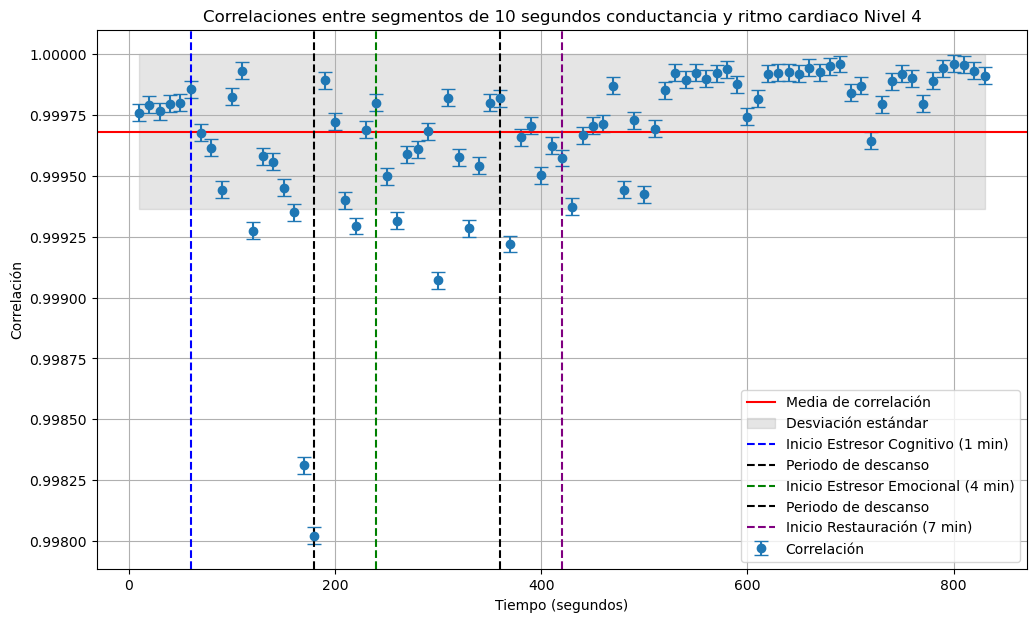

In [13]:
num_segments = len(df_4) // segment_size  # Cantidad de segmentos posibles

# Crear una lista para almacenar los vectores
vectors = []

# Iterar y dividir el DataFrame en segmentos de 320 entradas
for i in range(num_segments):
    start_index = i * segment_size
    end_index = (i + 1) * segment_size
    vectors.append(df_1.iloc[start_index:end_index].values.flatten())

# Calcular correlaciones entre pares de vectores
correlations = []
for i in range(1, len(vectors)):
    correlation = np.corrcoef(vectors[i-1], vectors[i])[0, 1]
    correlations.append(correlation)

# Calcular la media, desviación estándar y errores estándar
mean_corr = np.mean(correlations)
std_corr = np.std(correlations)
stderr_corr = std_corr / np.sqrt(len(correlations))

# Crear el eje x basado en el tiempo
time_axis = [(i * segment_size) / sampling_rate for i in range(1, len(correlations) + 1)]

# Graficar las correlaciones con barra de error
plt.figure(figsize=(12, 7))
plt.errorbar(time_axis, correlations, yerr=stderr_corr, fmt='o', capsize=5, label='Correlación')
plt.axhline(y=mean_corr, color='r', linestyle='-', label='Media de correlación')
plt.fill_between(time_axis, mean_corr - std_corr, mean_corr + std_corr, alpha=0.2, color='gray', label='Desviación estándar')

# Agregar líneas verticales para las fases
plt.axvline(x=60, color='blue', linestyle='--', label='Inicio Estresor Cognitivo (1 min)')
plt.axvline(x=180, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=240, color='green', linestyle='--', label='Inicio Estresor Emocional (4 min)')
plt.axvline(x=360, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=420, color='purple', linestyle='--', label='Inicio Restauración (7 min)')

# Etiquetas y título
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Correlación')
plt.title('Correlaciones entre segmentos de 10 segundos conductancia y ritmo cardiaco Nivel 4')
plt.legend()
plt.grid(True)
plt.show()

Ahora separamos ritmo cardiaco y conductancia

In [8]:
def eliminar_columnas_pares(df):
    # Filtrar columnas con índices impares
    columnas_impares = [col for idx, col in enumerate(df.columns) if idx % 2 != 0]
    return df[columnas_impares]

def eliminar_columnas_impares(df):
    # Filtrar columnas con índices impares
    columnas_impares = [col for idx, col in enumerate(df.columns) if idx % 2 == 0]
    return df[columnas_impares]


df_1_cardiaco = eliminar_columnas_impares(df_1)
df_1_conductancia = eliminar_columnas_pares(df_1)
df_2_cardiaco = eliminar_columnas_impares(df_2)
df_2_conductancia = eliminar_columnas_pares(df_2)
df_3_cardiaco = eliminar_columnas_impares(df_3)
df_3_conductancia = eliminar_columnas_pares(df_3)
df_4_cardiaco = eliminar_columnas_impares(df_4)
df_4_conductancia = eliminar_columnas_pares(df_4)

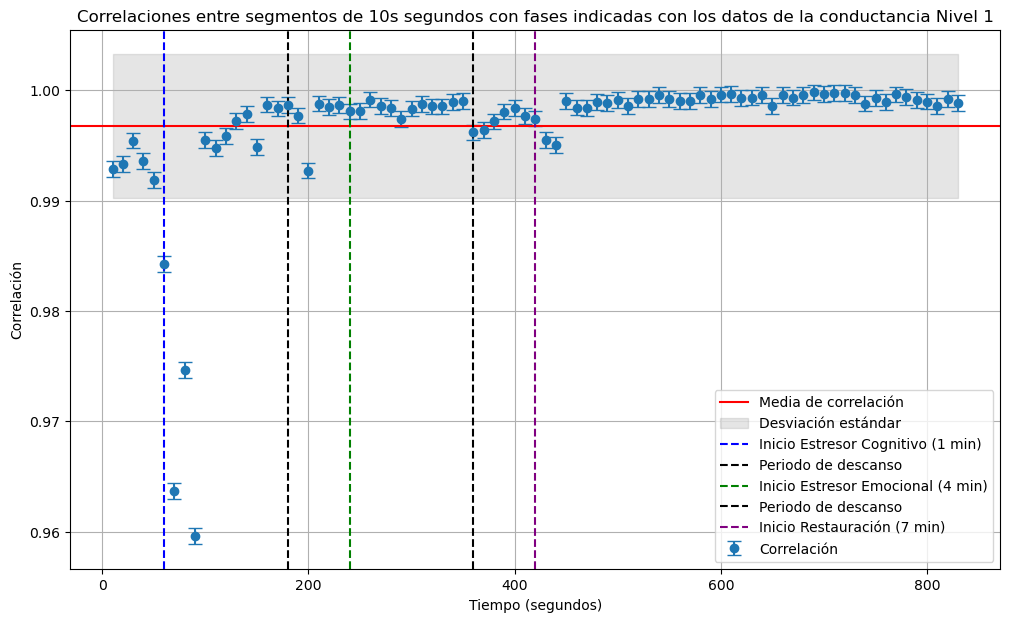

In [11]:
num_segments = len(df_2_cardiaco) // segment_size  # Cantidad de segmentos posibles

# Crear una lista para almacenar los vectores
vectors = []

# Iterar y dividir el DataFrame en segmentos de 320 entradas
for i in range(num_segments):
    start_index = i * segment_size
    end_index = (i + 1) * segment_size
    vectors.append(df_2_cardiaco.iloc[start_index:end_index].values.flatten())

# Calcular correlaciones entre pares de vectores
correlations = []
for i in range(1, len(vectors)):
    correlation = np.corrcoef(vectors[i-1], vectors[i])[0, 1]
    correlations.append(correlation)

# Calcular la media, desviación estándar y errores estándar
mean_corr = np.mean(correlations)
std_corr = np.std(correlations)
stderr_corr = std_corr / np.sqrt(len(correlations))

# Crear el eje x basado en el tiempo
time_axis = [(i * segment_size) / sampling_rate for i in range(1, len(correlations) + 1)]

# Graficar las correlaciones con barra de error
plt.figure(figsize=(12, 7))
plt.errorbar(time_axis, correlations, yerr=stderr_corr, fmt='o', capsize=5, label='Correlación')
plt.axhline(y=mean_corr, color='r', linestyle='-', label='Media de correlación')
plt.fill_between(time_axis, mean_corr - std_corr, mean_corr + std_corr, alpha=0.2, color='gray', label='Desviación estándar')

# Agregar líneas verticales para las fases
plt.axvline(x=60, color='blue', linestyle='--', label='Inicio Estresor Cognitivo (1 min)')
plt.axvline(x=180, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=240, color='green', linestyle='--', label='Inicio Estresor Emocional (4 min)')
plt.axvline(x=360, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=420, color='purple', linestyle='--', label='Inicio Restauración (7 min)')

# Etiquetas y título
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Correlación')
plt.title('Correlaciones entre segmentos de 10s segundos con fases indicadas con los datos de la conductancia Nivel 1')
plt.legend()
plt.grid(True)
plt.show()

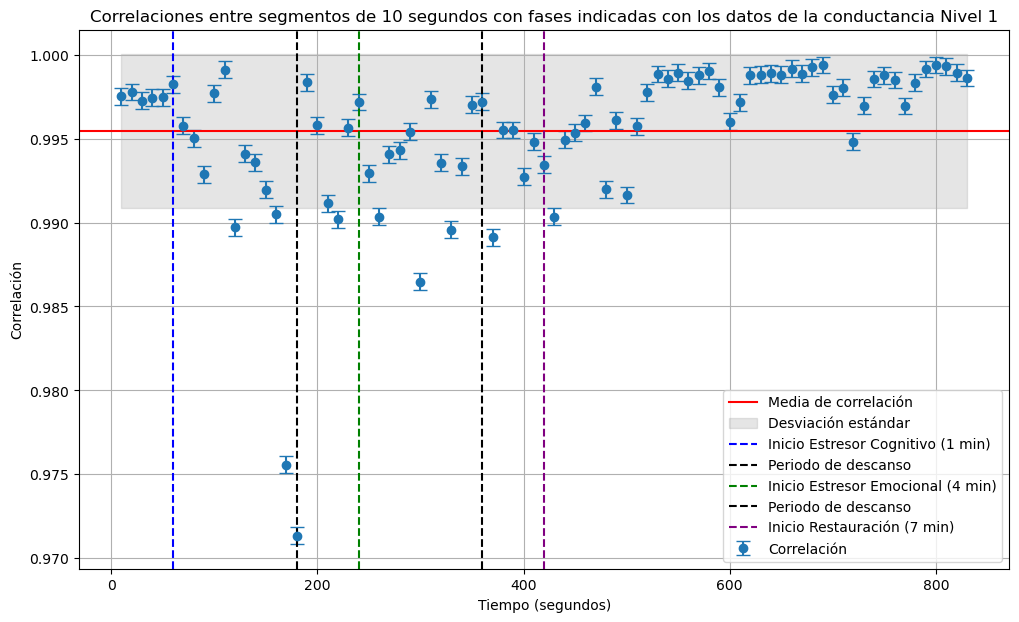

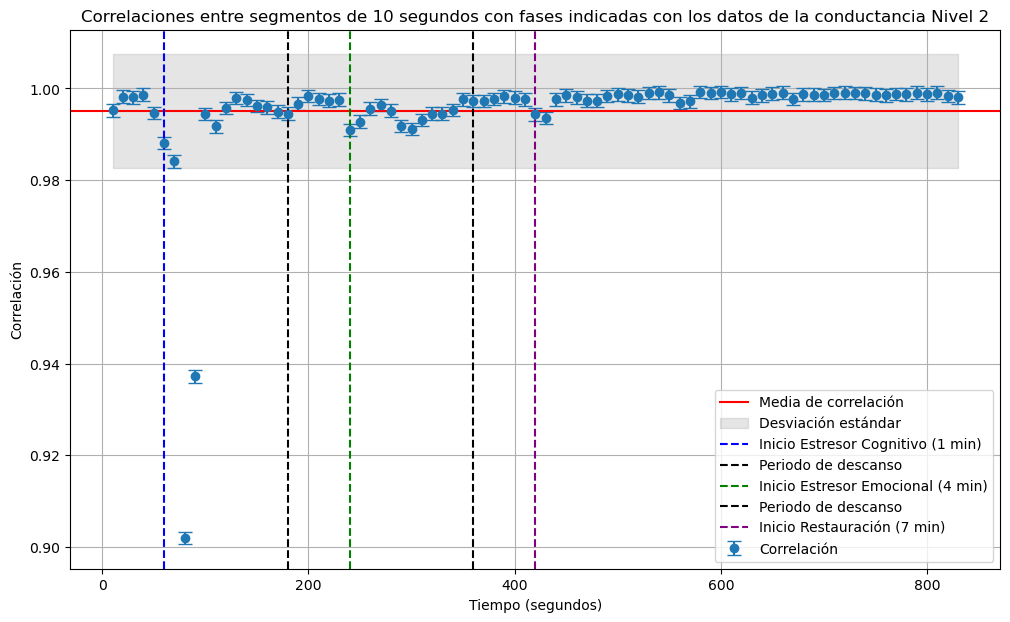

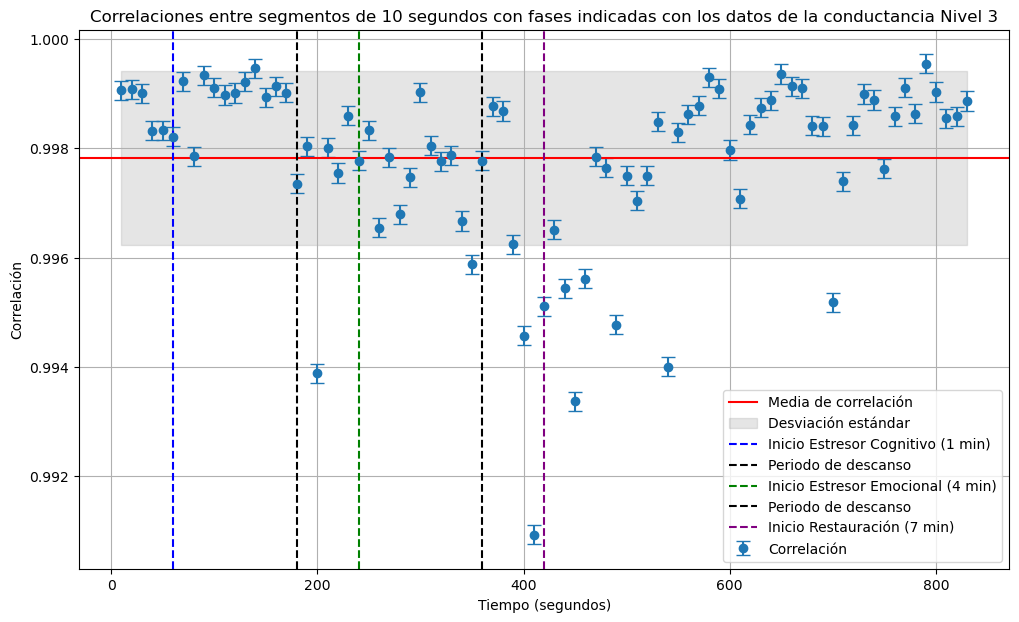

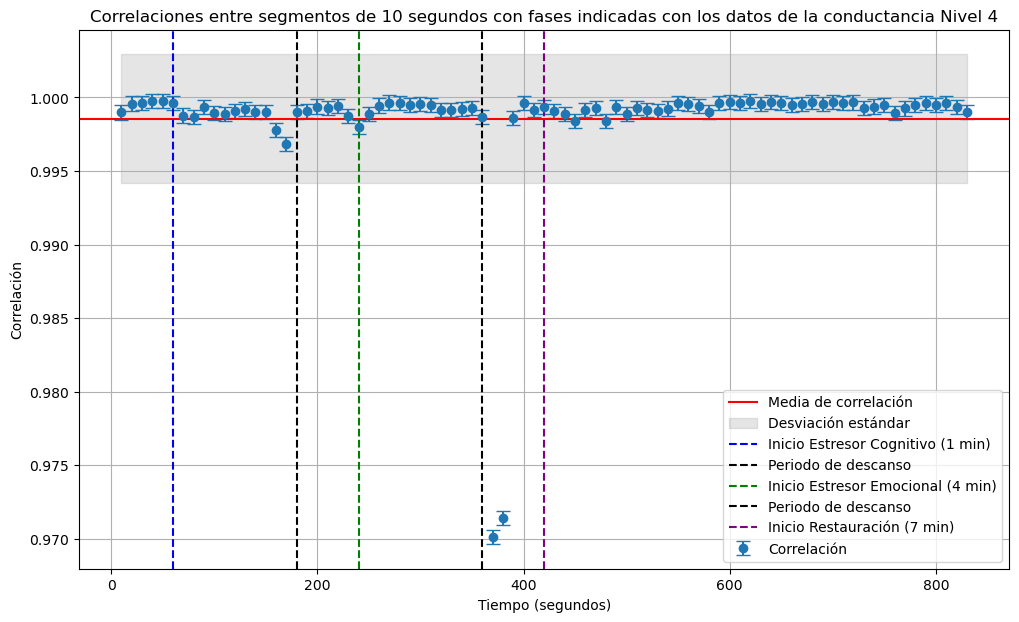

In [5]:
# Lista de DataFrames y títulos correspondientes
dataframes_conductancia = [df_1_conductancia, df_2_conductancia, df_3_conductancia, df_4_conductancia]
titles_conductancia = ['Nivel 1', 'Nivel 2', 'Nivel 3', 'Nivel 4']

# Loop sobre los DataFrames de conductancia
for idx, df_conductancia in enumerate(dataframes_conductancia):
    # Variables para el análisis
    segment_size = 320  # Tamaño del segmento de 10 segundos
    sampling_rate = 32  # Frecuencia de muestreo (32 Hz es un ejemplo; ajusta según tus datos)
    num_segments = len(df_conductancia) // segment_size  # Cantidad de segmentos posibles

    # Crear una lista para almacenar los vectores
    vectors = []

    # Iterar y dividir el DataFrame en segmentos de 320 entradas
    for i in range(num_segments):
        start_index = i * segment_size
        end_index = (i + 1) * segment_size
        vectors.append(df_conductancia.iloc[start_index:end_index].values.flatten())

    # Calcular correlaciones entre pares de vectores
    correlations = []
    for i in range(1, len(vectors)):
        correlation = np.corrcoef(vectors[i-1], vectors[i])[0, 1]
        correlations.append(correlation)

    # Calcular la media, desviación estándar y errores estándar
    mean_corr = np.mean(correlations)
    std_corr = np.std(correlations)
    stderr_corr = std_corr / np.sqrt(len(correlations))

    # Crear el eje x basado en el tiempo
    time_axis = [(i * segment_size) / sampling_rate for i in range(1, len(correlations) + 1)]

    # Graficar las correlaciones con barra de error
    plt.figure(figsize=(12, 7))
    plt.errorbar(time_axis, correlations, yerr=stderr_corr, fmt='o', capsize=5, label='Correlación')
    plt.axhline(y=mean_corr, color='r', linestyle='-', label='Media de correlación')
    plt.fill_between(time_axis, mean_corr - std_corr, mean_corr + std_corr, alpha=0.2, color='gray', label='Desviación estándar')

    # Agregar líneas verticales para las fases
    plt.axvline(x=60, color='blue', linestyle='--', label='Inicio Estresor Cognitivo (1 min)')
    plt.axvline(x=180, color='black', linestyle='--', label='Periodo de descanso')
    plt.axvline(x=240, color='green', linestyle='--', label='Inicio Estresor Emocional (4 min)')
    plt.axvline(x=360, color='black', linestyle='--', label='Periodo de descanso')
    plt.axvline(x=420, color='purple', linestyle='--', label='Inicio Restauración (7 min)')

    # Etiquetas y título
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Correlación')
    plt.title(f'Correlaciones entre segmentos de 10 segundos con fases indicadas con los datos de la conductancia {titles_conductancia[idx]}')
    plt.legend()
    plt.grid(True)
    
    # Mostrar la gráfica
    plt.show()


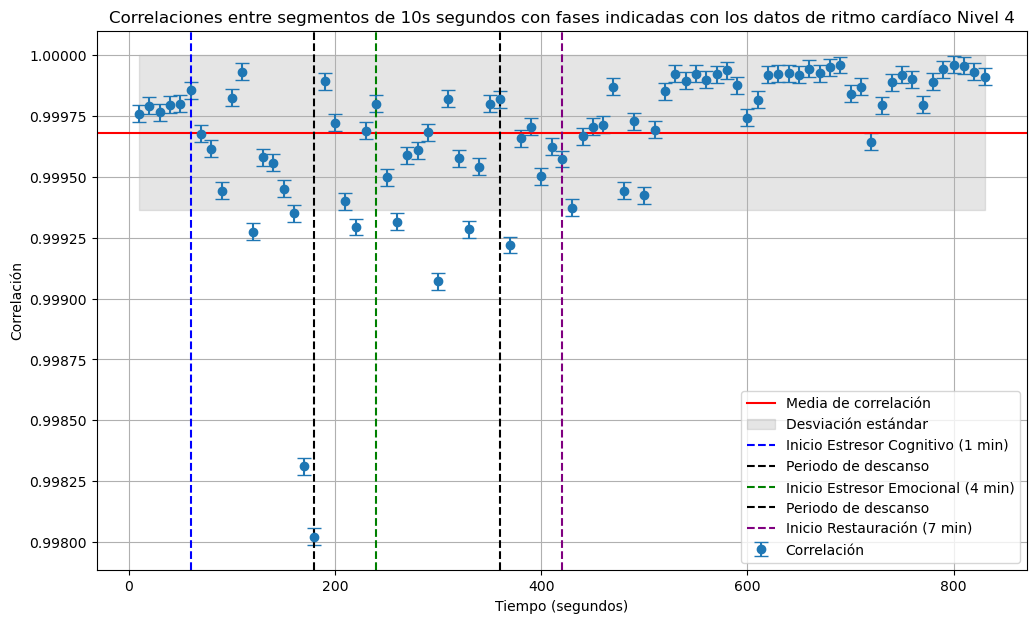

In [23]:
num_segments = len(df_4_cardiaco) // segment_size  # Cantidad de segmentos posibles

# Crear una lista para almacenar los vectores
vectors = []

# Iterar y dividir el DataFrame en segmentos de 320 entradas
for i in range(num_segments):
    start_index = i * segment_size
    end_index = (i + 1) * segment_size
    vectors.append(df_1.iloc[start_index:end_index].values.flatten())

# Calcular correlaciones entre pares de vectores
correlations = []
for i in range(1, len(vectors)):
    correlation = np.corrcoef(vectors[i-1], vectors[i])[0, 1]
    correlations.append(correlation)

# Calcular la media, desviación estándar y errores estándar
mean_corr = np.mean(correlations)
std_corr = np.std(correlations)
stderr_corr = std_corr / np.sqrt(len(correlations))

# Crear el eje x basado en el tiempo
time_axis = [(i * segment_size) / sampling_rate for i in range(1, len(correlations) + 1)]

# Graficar las correlaciones con barra de error
plt.figure(figsize=(12, 7))
plt.errorbar(time_axis, correlations, yerr=stderr_corr, fmt='o', capsize=5, label='Correlación')
plt.axhline(y=mean_corr, color='r', linestyle='-', label='Media de correlación')
plt.fill_between(time_axis, mean_corr - std_corr, mean_corr + std_corr, alpha=0.2, color='gray', label='Desviación estándar')

# Agregar líneas verticales para las fases
plt.axvline(x=60, color='blue', linestyle='--', label='Inicio Estresor Cognitivo (1 min)')
plt.axvline(x=180, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=240, color='green', linestyle='--', label='Inicio Estresor Emocional (4 min)')
plt.axvline(x=360, color='black', linestyle='--', label='Periodo de descanso')
plt.axvline(x=420, color='purple', linestyle='--', label='Inicio Restauración (7 min)')

# Etiquetas y título
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Correlación')
plt.title('Correlaciones entre segmentos de 10s segundos con fases indicadas con los datos de ritmo cardíaco Nivel 4')
plt.legend()
plt.grid(True)
plt.show()